In [2]:
!pip install geopandas

import geopandas as gpd
import pandas as pd

# GeoJSON 読み込み
gdf = gpd.read_file("mie_north_mesh.geojson")

# 統計データ（txt）読み込み
df = pd.read_csv("tblT001100S5236.txt", encoding="shift-jis", skiprows=[1])


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\yoshi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


In [3]:
# Convert 'KEY_CODE' column to integer type in both dataframes
gdf['KEY_CODE'] = gdf['KEY_CODE'].astype(int)
df['KEY_CODE'] = df['KEY_CODE'].astype(int)

# Join on KEY_CODE
merged = gdf.merge(df, on="KEY_CODE", how="left")

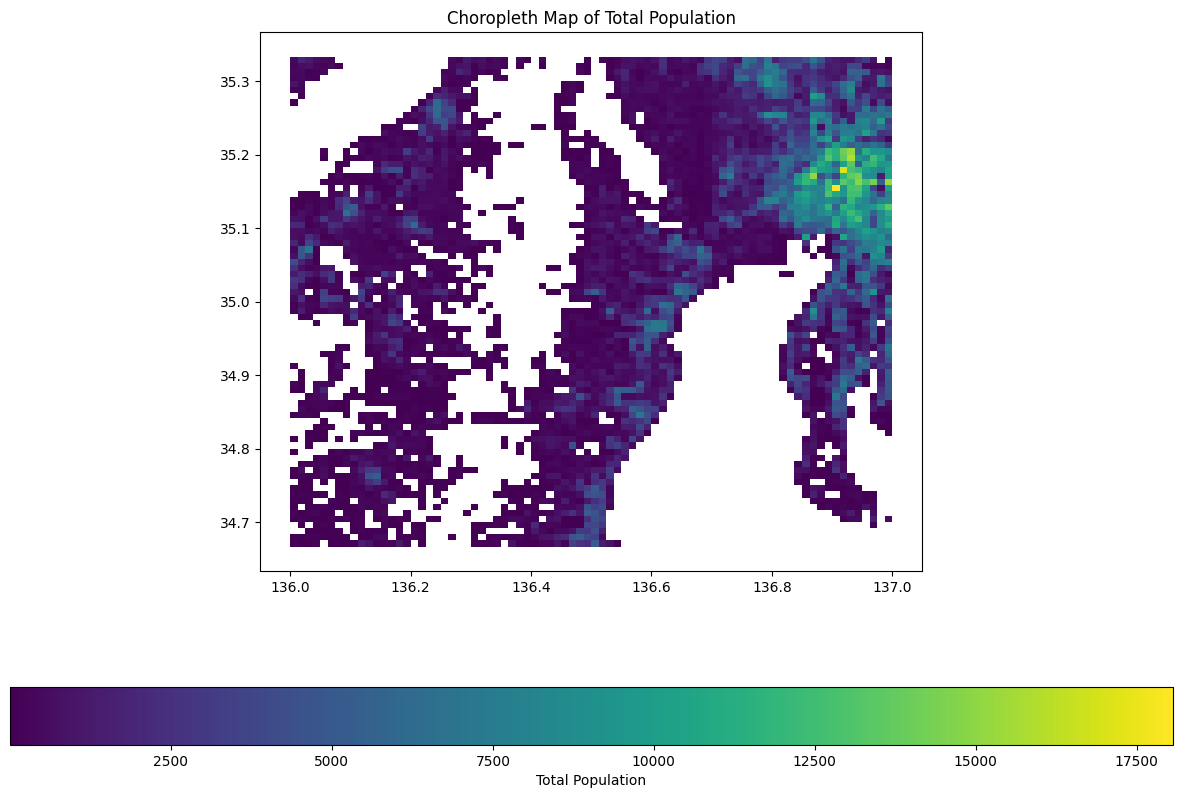

In [4]:
import matplotlib.pyplot as plt

# Make the plot larger
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Create a choropleth map
merged.plot(column='T001100001', ax=ax, legend=True,
            legend_kwds={'label': "Total Population",
                         'orientation': "horizontal"})

# Add a title (optional)
ax.set_title('Choropleth Map of Total Population')

# Display the plot
plt.show()

In [5]:
from IPython.display import FileLink

merged.to_file("mie_north_population.geojson", driver="GeoJSON")
FileLink("mie_north_population.geojson")

c:\Users\yoshi\OneDrive\デスクトップ\GIShomework9\week9homework\mie_north_population.geojson